In [1]:
import pystan

In [2]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    real y[J]; // estimated treatment effects
    real<lower=0> sigma[J]; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    real eta[J];
}
transformed parameters {
    real theta[J];
    for (j in 1:J)
    theta[j] <- mu + tau * eta[j];
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

In [3]:
schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

In [4]:
fit = pystan.stan(model_code=schools_code, data=schools_dat,
                  iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_95013624776d537c3cd7cd4d641c30e0 NOW.


In [9]:
fit

Inference for Stan model: anon_model_95013624776d537c3cd7cd4d641c30e0.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu         7.92    0.16   5.01  -2.26    4.8   8.05  10.97  17.64   1009    1.0
tau        6.45    0.21   5.31   0.27   2.43   5.31   9.02  20.11    623    1.0
eta[0]     0.39    0.02   0.92  -1.48  -0.22   0.41   1.05   2.11   2000    1.0
eta[1]     0.02    0.02   0.87  -1.69  -0.57 6.4e-3   0.57   1.74   1649    1.0
eta[2]    -0.21    0.02   0.93  -2.05   -0.8  -0.22   0.38   1.77   2000    1.0
eta[3]    -0.02    0.02    0.9  -1.81   -0.6  -0.02   0.55   1.74   2000    1.0
eta[4]    -0.37    0.02   0.84  -1.96  -0.94   -0.4   0.18   1.37   2000    1.0
eta[5]    -0.22    0.02   0.88  -1.83   -0.8  -0.24   0.35   1.58   2000    1.0
eta[6]     0.34    0.02    0.9  -1.51  -0.23   0.35   0.93   2.07   1627    1.0
eta[7]   9.9e

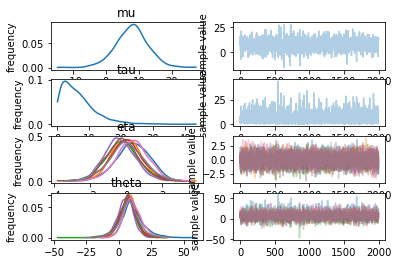

In [10]:
fit.plot()

In [6]:
la = fit.extract(permuted=True)
mu = la['mu']

mu

array([  7.67236122,  15.44631759,   8.45673618, ...,  14.02485309,
        10.99409021,  14.2656072 ])

In [7]:
# array of three dimensions: iterations, chains, params
a = fit.extract(permuted=False)
a

array([[[  6.95238309e+00,   2.39466106e-01,   1.09366114e-01, ...,
           7.17667931e+00,   6.49403711e+00,  -8.14186435e+00],
        [  1.03692076e+01,   5.15063772e+00,  -7.37860858e-01, ...,
           1.46620647e+01,   3.47306610e+00,  -4.88489555e+00],
        [  8.41169533e+00,   1.11568347e+00,  -6.53082735e-01, ...,
           7.04046342e+00,   9.46706736e+00,  -5.30434113e+00],
        [  1.25074458e+01,   3.99368171e+00,   1.29355620e-01, ...,
           1.44154769e+01,   1.69366842e+01,  -4.31138689e+00]],

       [[  6.51275920e+00,   5.97035298e-01,   1.93682556e+00, ...,
           6.16972020e+00,   7.21767557e+00,  -5.97021209e+00],
        [  4.72048027e+00,   3.92309613e+00,   7.92055304e-01, ...,
           3.20913769e+00,   6.34149286e+00,  -2.23755736e+00],
        [ -3.64288333e+00,   6.15861887e+00,   1.66336470e+00, ...,
           1.07547760e+01,  -5.54016899e+00,  -6.98802924e+00],
        [  8.70429266e+00,   7.32928642e+00,   3.80710884e-01, ...,
      